In [1]:
# Creat a dictionary to match glottolog languages with IVS language spoken at home

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd


##language Spoken at Home from IVS & Glottolog Languages from D-Place Database
# Define the complete language mapping as a list of tuples
language_data = [
    ('Adaŋgbi; Dangbe', 'Adangbe'),
    ('Afar', 'Afar'),
    ('Afrikaans', 'Afrikaans'),
    ('Ahanta', 'Ahanta'),
    ('Akan; Akuapem', 'Akan'),
    ('Aklanon', 'Aklanon'),
    ('Albanian', 'Arbëreshë Albanian'),
    ('Albanian', 'Arvanitika Albanian'),
    ('Albanian', 'Gheg Albanian'),
    ('Albanian', 'Northern Tosk Albanian'),
    ('Algerian Arabic', 'Algerian Arabic'),
    ('Algerian Arabic', 'Algerian Saharan Arabic'),
    ('Amharic', 'Amharic'),
    ('Anaang', 'Anaang'),
    ('Anfillo', 'Anfillo'),
    ('Arabic', 'Turku-Bongor Pidgin Arabic'),
    ('Arabic', "Ta'izzi-Adeni Arabic"),
    ('Arabic', 'Sudanese Arabic'),
    ('Arabic', 'Standard Arabic'), 
    ('Arabic', 'South Sudanese Creole Arabic'), 
    ('Arabic', 'Sanaani Arabic'), 
    ('Arabic', 'Saidi Arabic'),
    ('Arabic', 'Romanian Pidgin Arabic'),
    ('Arabic', 'Qashqa-Darya Arabic'),
    ('Arabic', 'Pidgin Gulf Arabic'),
    ('Arabic', 'Omani Arabic'), 
    ('Arabic', 'North Mesopotamian Arabic'), 
    ('Arabic', 'Najdi Arabic'), 
    ('Arabic', 'Levantine Arabic'),
    ('Arabic', 'Khorasan Arabic'), 
    ('Arabic', 'Judeo-Yemeni Arabic'), 
    ('Arabic', 'Judeo-Tripolitanian Arabic'),
    ('Arabic', 'Judeo-Moroccan Arabic'),
    ('Arabic', 'Judeo-Iraqi Arabic'),
    ('Arabic', 'Jordanian Bengali Pidgin Arabic'),
     ('Arabic', 'Hijazi Arabic'),
    ('Arabic', 'Hadrami Arabic'),
    ('Arabic', 'Gulf Arabic'),
    ('Arabic', 'Gilit Mesopotamian Arabic'),
    ('Arabic', 'Egyptian Arabic'),
    ('Arabic', 'Eastern Egyptian Bedawi Arabic'),
    ('Arabic', 'Dhofari Arabic'),
    ('Arabic', 'Cypriot Arabic'),
    ('Arabic', 'Chadian Arabic'),
    ('Arabic', 'Baharna Arabic'),
    ('Arabic', 'Babalia Creole Arabic'),
    ('Arabic', 'Andalusian Arabic'),
    ('Arakanese', 'Arakanese'),
    ('Armenian; Hayeren', 'Classical-Middle Armenian'),
    ('Armenian; Hayeren', 'Western Armenian'),
    ('Armenian; Hayeren', 'Eastern Armenian'),
    ('Assamese', 'Assamese'),
    ('Assyrian Neo-Aramaic', 'Assyrian Neo-Aramaic'),
    ('Ateso; Teso', 'Teso'),
    ('Aushi; Ushi', 'Aushi'),
    ('Auslan', 'Auslan'),
    ('Avar; Avaric', 'Avar'),
    ('Awadhi', 'Awadhi'),
    ('Aymara', 'Central Aymara'),
    ('Aymara', 'Southern Aymara'),
    ('Azerbaijani;  Azeri', 'North Azerbaijani'),
    ('Azerbaijani;  Azeri', 'South Azerbaijani'),
    ('Balinese', 'Balinese'),
    ('Balochi', 'Eastern Balochi'),
    ('Balochi', 'Southern Balochi'),
    ('Balochi', 'Western Balochi'),
    ('Bambara', 'Bambara'),
    ('Banjar', 'Banjar'),
    ('Basari', None),
    ('Basque', 'Basque'),
    ('Bassa', 'Bassa'),
    ('Batak', 'Batak Simalungun'),
    ('Batak', 'Batak Toba'),
    ('Batak', 'Batak Angkola'),
    ('Batak', 'Batak Mandailing'),
    ('Batak', 'Batak Alas-Kluet'),
    ('Batak', 'Batak Karo'),
    ('Batak', 'Batak Dairi'),
    ('Batak', 'Batak'),
    ('Bekwarra/Bakwarra', 'Bekwarra'),
    ('Belarusian', 'Belarusian'),
    ('Bemba', 'Bemba (Zambia)'),
    ('Bemba', 'Bemba (Democratic Republic of Congo)'),
    ('Bengali; Bangla', 'Bengali'),
    ('Berber; Amazigh;Tamaziɣt', None),
    ('Berta', 'Berta'),
    ('Betawi', 'Betawi'),
    ('Bhili', 'Bhili'),
    ('Bhojpuri', 'Bhojpuri'),
    ('Bidayuh languages', 'Bau-Jagoi Bidayuh'),
    ('Bidayuh languages', 'Biatah Bidayuh'),
    ('Bidayuh languages', 'Bukar-Sadung Bidayuh'),
    ('Bidayuh languages', 'Tringgus-Sembaan Bidayuh'),
    ('Bikol; Bicolano', 'Inland-Buhi-Daraga Bikol'),
    ('Bikol; Bicolano', 'Coastal-Naga Bikol'),
    ('Bikol; Bicolano', 'Coastal-Virac Bikol'),
    ('Bimoba', 'Bimoba'),
    ('Bislama; Creole', 'Bislama'),
    ('Bissa', 'Bissa'),
    ('Blaan', 'Koronadal Blaan'),
    ('Blaan', 'Sarangani Blaan'),
    ('Bosnian', 'Serbian-Croatian-Bosnian'),
    ('Brahui', 'Brahui'),
    ('Braj; Braj Bhasha; Braji', 'Braj'),
    ('Buginese/Bugis', 'Buginese'),
    ('Bulgarian', 'Bulgarian'),
    ('Bundeli/Bundelkhandi', 'Bundeli'),
    ('Burmese', 'Burmese'),
    ('Bussa; Mossiya', 'Bussa'),
    ('Cantonese', 'Yue Chinese'),
    ('Catalan; Valencian', 'Catalan'),
    ('Cebuano; Bisaya; Binisaya', 'Cebuano'),
    ('Central Dusun; Bunduliwan; Kadazandusun', None),
    ('Central Khmer', 'Central Khmer'),
    ('Chamba Daka', None),
    ('Chavacano; Chabacano', 'Chavacano'),
    ('Chechen', 'Chechen'),
    ('Chhattisgarhi', 'Chhattisgarhi'),
    ('Chichewa, Chewa, Nyanja', 'Nyanja'),
    ('Chitoko', None),
    ('Chokwe', 'Chokwe'),
    ('Croatian', 'Serbian-Croatian-Bosnian'),
    ('Czech', 'Czech'),
    ('Dagaare', 'Central Dagaare'),
    ('Dagbani', 'Dagbani'),
    ('Danish', 'Danish'),
    ('Danish', 'East Danish'),
    ('Danish', 'Traveller Danish'),
    ('Dhundhari', None),
    ('Dioula', 'Dagaari Dioula'),
    ('Divehi, Dhivehi, Maldivian', None),
    ('Dogri', 'Dogri'),
    ('Dungan', 'Dungan'),
    ('Dutch; Flemish', 'Dutch'),
    ('Dutch; Flemish', 'Middle Dutch'),
    ('Dutch; Flemish', 'Old Dutch-Old Frankish'),
    ('Ebira; Igbira, Okpoto, Okene', 'Ebira'),
    ('Edo', None),
    ('Efik', 'Efik'),
    ('English', 'Virgin Islands Creole English'),
    ('English', 'Vincentian Creole English'),
    ('English', 'Turks And Caicos Creole English'),
    ('English', 'Trinidadian Creole English'),
    ('English', 'Tobagonian Creole English'),
    ('English', 'South Australian Pidgin English'),
    ('English', 'Solombala English'),
    ('English', 'Sea Island Creole English'),
    ('English', 'San Andres Creole English'),
    ('English', 'Queensland Kanaka English'),
    ('English', 'Papuan Pidgin English'),
    ('English', 'Old English (ca. 450-1100)'),
    ('English', 'Nicaragua Creole English'),
    ('English', 'Middle English'),
    ('English', 'Kru Pidgin English'),
    ('English', 'Jamaican Creole English'),
    ('English', "Hawai'i Creole English"),
    ('English', 'Guyanese Creole English'),
    ('English', 'Grenadian Creole English'),
    ('English', 'Ghanaian Pidgin English'),
    ('English', 'English'),
    ('English', 'Chinese Pidgin English'),
    ('English', 'Butler English'),
    ('English', 'Bonin English Pidgin'),
    ('English', 'Belize Kriol English'),
    ('English', 'Bahamas Creole English'),
     ('English', 'Antigua and Barbuda Creole English'),
    ('English', 'American Indian Pidgin English'),
    ('Esan', 'Esan'),
    ('Estonian', 'Estonian'),
    ('Estonian', 'Estonian Swedish'),
    ('Estonian', 'South Estonian'),
    ('Ewe', 'Ewe'),
    ('Fante; Fanti:  Fantse; Mfantse', None),
    ('Filipino; Pilipino', 'Filipino'),
    ('Finnish', 'Finnish'),
    ('Frafra', 'Farefare'),
    ('French', 'French'),
    ('Fulah; Fulani ; Fulfulde', 'Adamawa Fulfulde'),
    ('Fulah; Fulani ; Fulfulde', 'Bagirmi Fulfulde'),
    ('Fulah; Fulani ; Fulfulde', 'Borgu Fulfulde'),
    ('Fulah; Fulani ; Fulfulde', 'Central-Eastern Niger Fulfulde'),
    ('Fulah; Fulani ; Fulfulde', 'Maasina Fulfulde'),
    ('Fulah; Fulani ; Fulfulde', 'Hausa States Fulfulde'),
    ('Fulah; Fulani ; Fulfulde', 'Western Niger Fulfulde'),
    ('Ga', None),
    ('Gagauz', 'Gagauz'),
    ('Galician', 'Galician'),
    ('Gamo-Gofa-Dawro', 'Gamo-Gofa-Dawro'),
    ('Ganda; Luganda', 'Ganda'),
    ('Garifuna', 'Garifuna'),
    ('Georgian', 'Georgian'),
    ('German', 'German'),
    ('German', 'Central East Middle German'),
    ('German', 'German Northern Low Saxon'),
    ('German', 'Eastern Low German'),
    ('German', 'Middle High German'),
    ('German', 'Middle Low German'),
    ('Gilaki', 'Gilaki'),
    ('Gondi', 'Aheri Gondi'),
    ('Gondi', 'Northern Gondi'),
    ('Gondi', 'Adilabad Gondi'),
    ('Gonja', 'Gonja'),
    ('Gova', None),
    ('Greek, Modern', 'Modern Greek'),
    ('Gua', 'Gua'),
    ('Guarani', 'Paraguayan Guaraní'),
    ('Guarani', 'Western Bolivian Guaraní'),
    ('Guarani', 'Eastern Bolivian Guaraní'),
     ('Guarani', 'Mbyá Guaraní'),
    ('Gujarati', 'Gujarati'),
    ('Gun; Egun', 'Gun'),
    ('Gurage Languages', 'Sebat Bet Gurage'),
    ('Gwari; Gbari ; Gbagyi', 'Gbari'),
    ('Gwari; Gbari ; Gbagyi', 'Gbagyi'),
    ('Hadiyya', 'Hadiyya'),
    ('Haitian; Haitian Creole', 'Haitian'),
    ('Hakka Chinese', 'Hakka Chinese'),
    ('Harari', 'Harari'),
    ('Harauti', 'Hadothi'),
    ('Haryanvi; Haryanavi', 'Haryanvi'),
    ('Hassaniyya, Klem El Bithan', 'Hassaniyya'),
    ('Hausa', 'Hausa'),
    ('Hebrew', 'Modern Hebrew'),
    ('Hiligaynon; Ilonggo', 'Hiligaynon'),
    ('Hindi', 'Hindi'),
    ('Hindko', 'Northern Hindko'),
    ('Hindko', 'Southern Hindko'),
    ('Hokkien; Minnan', None),
    ('Huba; Kilba', 'Huba'),
    ('Hungarian', 'Hungarian'),
    ('Iban', 'Iban'),
    ('Ibibio', 'Ibibio'),
    ('Idoma', 'Idoma'),
    ('Igala', 'Igala'),
    ('Igbo', 'Igbo'),
    ('Ijaw', 'Kalabari'),
    ('Ijaw', 'Izon'),
    ('Ijaw', 'Biseni'),
    ('Ijaw', 'Arogbo'),
    ('Ijaw', 'Kolokuma'),
    ('Ikwerre', 'Ikwere'),
    ('Ila', 'Ila'),
    ('Indonesian', 'Indonesian Bajau'),
    ('Indonesian', 'Peranakan Indonesian'),
    ('Irish', 'Irish'),
    ('Irish', 'Irish Anglo-Norman'),
    ('Isan; North Eastern Thai', None),
    ('Isoko', 'Isoko'),
    ('Italian', 'Italian'),
    ('Itneg', 'Banao Itneg'),
     ('Itneg', 'Binongan Itneg'),
    ('Itneg', 'Inlaod Itneg'),
    ('Itneg', 'Maeng Itneg'),
    ('Itneg', 'Masadiit Itneg'),
    ('Itneg', 'Moyadan Itneg'),
    ('Jam Sai; Dogon', 'Jamsay Dogon'),
    ('Japanese', 'Japanese'),
    ('Javanese', 'Javanese'),
    ('Kabardian', 'Kabardian'),
    ('Kabiye', None),
    ('Kalanga', 'Kalanga'),
    ('Kalenjin', None),
    ('Kalmyk Oirat', 'Oirad-Kalmyk-Darkhat'),
    ('Kamayo', 'Kamayo'),
    ('Kamba', 'Kamba (Brazil)'),
    ('Kamba', 'Kamba (Kenya)'),
    ('Kambaata', 'Kambaata'),
    ('Kankanaey', 'Kankanaey'),
    ('Kannada', 'Kannada'),
    ('Kaonde', 'Kaonde'),
    ('Kapampangan', None),
    ('Kaqchikel', 'Kaqchikel'),
    ('Karakalpak', None),
    ('Karanga; Korekore', 'Karanga'),
    ('Kasena', None),
    ('Kashmiri', 'Kashmiri'),
    ('Kazakh', 'Kazakh'),
    ('Kelabit', 'Kelabit'),
    ('Kikuyu; Gikuyu', 'Kikuyu'),
    ('Kinyarwanda', 'Kinyarwanda'),
    ('Kirghiz; Kyrgyz', 'Kirghiz'),
    ('Kirike', 'Kirike'),
    ('Kisii', None),
    ('Komi', 'Komi-Zyrian'),
    ('Komi', 'Komi-Permyak'),
    ('Komi', 'Komi-Yazva'),
    ('Konkani', 'Goan Konkani'),
     ('Konkomba', 'Konkomba'),
    ('Konso', 'Konso'),
    ('Korean', 'Korean'),
    ('Kullui; Kulvi', None),
    ('Kurdish; Yezidi', 'Northern Kurdish'),
    ('Kurukh; Oraon', 'Kurukh'),
    ('Kusasi', None),
    ('Lamba', 'Lamba'),
    ('Lampung', 'Lampung Nyo'),
    ('Lampung', 'Lampung Api'),
    ('Lao', 'Lao'),
    ('Latvian', 'Latvian'),
    ('Laz', 'Laz'),
    ('Lenje', 'Lenje'),
    ('Lezgian; Lezgi; Lezgin', 'Lezgian'),
    ('Lithuanian', 'Lithuanian'),
    ('Lozi', 'Lozi'),
    ('Luhya', None),
    ('Lunda', 'Lunda'),
    ('Luo, Lwo; Lwoian', 'Luo (Cameroon)'),
    ('Luo, Lwo; Lwoian', 'Luo (Kenya and Tanzania)'),
    ('Lurish; Luri; Bakhtiari', 'Northern Luri'),
    ('Lurish; Luri; Bakhtiari', 'Southern Luri'),
    ('Lurish; Luri; Bakhtiari', 'Luri'),
    ('Lurish; Luri; Bakhtiari', 'Bakhtiari'),
    ('Luvale', 'Luvale'),
    ('Maasai', None),
    ('Macedonian', 'Macedonian'),
    ('Madurese', 'Madurese'),
    ('Magahi', 'Magahi'),
    ('Maguindanao', 'Maguindanao'),
    ('Maithili', 'Maithili'),
    ('Makassarese', None),
    ('Malay; Malaysian', 'Standard Malay'),
    ('Malayalam', 'Malayalam'),
    ('Maltese', 'Maltese'),
    ('Malvi', 'Malvi'),
    ('Mambwe', 'Mambwe-Lungu'),
    ('Mampruli', 'Mampruli'),
    ('Maninka; Malinke', 'Eastern Maninkakan'),
    ('Maninka; Malinke', 'Forest Maninka'),
    ('Maninka; Malinke', 'Kita Maninkakan'),
    ('Maninka; Malinke', 'Konyanka Maninka'),
    ('Maninka; Malinke', 'Sankaran Maninka'),
    ('Maninka; Malinke', 'Western Maninkakan'),
    ('Manobo', 'Agusan Manobo'),
    ('Manobo', 'Ata Manobo'),
    ('Manobo', 'Cinamiguin Manobo'),
    ('Manobo', 'Cotabato Manobo'),
    ('Manobo', 'Dibabawon Manobo'),
    ('Manobo', 'Ilianen Manobo'),
    ('Manobo', 'Matigsalug Manobo'),
    ('Manobo', 'Obo Manobo'),
    ('Manobo', 'Rajah Kabunsuwan Manobo'),
    ('Manobo', 'Sarangani Manobo'),
    ('Manobo', 'Western Bukidnon Manobo'),
    ('Maori', 'Maori'),
    ('Mara; Lakher', 'Mara Chin'),
    ('Maranao', 'Maranao'),
    ('Marathi', 'Konkan Marathi'),
    ('Marathi', 'Marathi'),
    ('Marwari', 'Marwari (Pakistan)'),
    ('Marwari', 'Marwari (India)'),
    ('Masaba', None),
    ('Mayan languages', 'Epigraphic Mayan'),
    ('Mbunda', 'Mbunda'),
    ('Melanau', 'Central Melanau'),
    ('Melanau', 'Daro-Matu Melanau'),
    ('Melanau', 'Kanowit-Tanjong Melanau'),
    ('Melanau', 'Sibu Melanau'),
    ('Meru', 'Meru'),
    ('Mijikenda', None),
    ('Minangkabau', 'Minangkabau'),
    ('Moldovan', None),
    ('Mon', 'Mon'),
    ('Mon', 'Biao Mon'),
    ('Mon', 'Yangum Mon'),
    ('Mongolian', 'Halh Mongolian'),
    ('Mongolian', 'Peripheral Mongolian'),
    ('Montenegrin', None),
    ('Moroccan Arabic', 'Moroccan Arabic'),
    ('Mossi; Moore', 'Mossi'),
    ('Muong', 'Muong'),
    ('Murutic languages', None),
    ('Nambya', 'Nambya'),
      ('Namwanga', None),
    ('Ndau; chiNdau', 'Ndau'),
    ('Nepali', 'Nepali'),
    ('Nigerian Pidgin', 'Nigerian Pidgin'),
    ('Nkoya', 'Nkoya'),
    ('North Ndebele', 'Zimbabwean Ndebele'),
    ('Northern Sotho', None),
    ('Northern Thai; Lanna', 'Northern Thai'),
    ('Norwegian', None),
    ('Nsenga', 'Nsenga'),
    ('Nupe', 'Nupe-Nupe-Tako'),
    ('Nzema; Nzima', 'Nzima'),
    ('Oriya', 'Kotia-Adivasi Oriya-Desiya'),
    ('Oromo', 'West Central Oromo'),
    ('Oromo', 'Eastern Oromo'),
    ('Oromo', 'Borana-Arsi-Guji Oromo'),
    ('Ossetian; Ossetic', 'Iron Ossetian'),
    ('Ossetian; Ossetic', 'Digor Ossetian'),
    ('Palembang', None),
    ('Pamiri languages', None),
    ('Pangasinan', 'Pangasinan'),
    ('Pashto, Pushto', 'Southern Pashto'),
    ('Pashto, Pushto', 'Central Pashto'),
    ('Pashto, Pushto', 'Northern Pashto'),
    ('Persian; Farsi; Dari', 'Dari'),
    ('Polish', 'Polish'),
    ('Portuguese', 'Portuguese'),
    ('Punjabi, Panjabi', 'Western Panjabi'),
    ('Punjabi, Panjabi', 'Eastern Panjabi'),
    ('Quechua', 'Yauyos Quechua'),
    ('Quechua', 'Southern Pastaza Quechua'),
    ('Quechua', 'Southern Conchucos Ancash Quechua'),
    ('Quechua', 'South Bolivian Quechua'),
    ('Quechua', 'Sihuas Ancash Quechua'),
    ('Quechua', 'San Martín Quechua'),
    ('Quechua', 'Puno Quechua'),
    ('Quechua', 'Panao Huánuco Quechua'),
    ('Quechua', 'Pacaraos Quechua'),
    ('Quechua', 'North Junín Quechua'),
    ('Quechua', 'Northern Conchucos Ancash Quechua'),
    ('Quechua', 'North Bolivian Quechua'),
     ('Quechua', 'Napo Lowland Quechua'),
    ('Quechua', 'Margos-Yarowilca-Lauricocha Quechua'),
    ('Quechua', 'Lambayeque Quechua'),
    ('Quechua', 'Jauja Wanca Quechua'),
    ('Quechua', 'Huaylla Wanca Quechua'),
    ('Quechua', 'Huaylas Ancash Quechua'),
    ('Quechua', 'Huamalíes-Dos de Mayo Huánuco Quechua'),
    ('Quechua', 'Huallaga Huánuco Quechua'),
    ('Quechua', 'Eastern Apurímac Quechua'),
    ('Quechua', 'Cusco Quechua'),
    ('Quechua', 'Corongo Ancash Quechua'),
    ('Quechua', 'Classical Quechua'),
    ('Quechua', 'Chiquián Ancash Quechua'),
    ('Quechua', 'Chincha Quechua'),
    ('Quechua', 'Chilean Quechua'),
    ('Quechua', 'Chaupihuaranga Quechua'),
    ('Quechua', 'Chachapoyas Quechua'),
    ('Quechua', 'Cajatambo North Lima Quechua'),
    ('Quechua', 'Cajamarca Quechua'),
    ('Quechua', 'Ayacucho Quechua'),
    ('Quechua', 'Arequipa-La Unión Quechua'),
    ('Quechua', 'Ambo-Pasco Quechua'),
    ('Romani; Romany', 'Welsh Romani'),
    ('Romani; Romany', 'Vlax Romani'),
    ('Romani; Romany', 'Tavringer Romani'),
    ('Romani; Romany', 'Sinte-Manus Romani'),
    ('Romani; Romany', 'Central Romani'),
    ('Romani; Romany', 'Baltic Romani'),
    ('Romani; Romany', 'Balkan Romani'),
    ('Romani; Romany', 'Kalo Finnish Romani'),
    ('Romanian, Moldavian, Moldovan', 'Romanian'),
    ('Romansh', 'Romansh'),
    ('Romblomanon', 'Romblomanon'),
    ('Rundi; Kirundi', 'Rundi'),
    ('Russian', 'Russian'),
    ('Rusyn', 'Rusyn'),
    ('Saho', 'Saho'),
    ('Sama-Bajaw', None),
    ('Santali', 'Santali'),
    ('Saraiki', 'Saraiki'),
    ('Sasak', 'Sasak'),
     ('Scottish gaelic', 'Scottish Gaelic'),
    ('Senufo', None),
    ('Serbian', 'Serbian-Croatian-Bosnian'),
    ('Sgaw Karen; Sgaw Kayin; Karen', 'Karen'),
    ('Shan', 'Shan'),
    ('Sheko', 'Sheko'),
    ('Shona;chiShona', 'Shona'),
    ('Sidamo; Sidaama;  Sidaamu Afoo', 'Sidamo'),
    ('Siltʼe', "Silt'e"),
    ('Sindhi', 'Sindhi'),
    ('Sinhala, Sinhalese', 'Sinhala'),
    ('Sisaala', 'Western Sisaala'),
    ('Sisaala', 'Tumulung Sisaala'),
    ('Slovak', 'Slovak'),
    ('Slovenian', 'Slovenian'),
    ('Soddo', None),
    ('Soga/Lusoga', 'Soga'),
    ('Soli', 'Soli'),
    ('Somali', 'Somali'),
    ('Songhay', 'Humburi Senni Songhay'),
    ('Songhay', 'Koyra Chiini Songhay'),
    ('Soninke', 'Soninke'),
    ('South Ndebele', 'Sumayela Ndebele'),
    ('Southern Sotho', 'Southern Sotho'),
    ('Southern Thai; Dambro; Pak Thai', 'Southern Thai'),
    ('Spanish; Castilian', 'Spanish'),
    ('Standard Chinese; Mandarin; Putonghua; Guoyu', 'Mandarin Chinese'),
    ('Sulawesi languages', 'Boano (Sulawesi)'),
    ('Sundanese', 'Sundanese'),
    ('Surigaonon', 'Surigaonon'),
    ('Swahili', 'Swahili'),
    ('Swahili', 'Congo Swahili'),
    ('Swahili', 'Cutchi-Swahili'),
    ('Swati; Swazi, siSwati', 'Swati'),
    ('Swedish', None),
    ('Tagalog', 'Tagalog'),
    ('Tahaggart Tamahaq', 'Tahaggart Tamahaq'),
    ('Tajik', 'Tajik'),
    ('Tajik', 'Tajiki Arabic'),
     ('Talish', None),
    ('Tamil', 'Tamil'),
    ('Tatar', 'Tatar'),
    ('Tatar', 'Crimean Tatar'),
    ('Tatar', 'Siberian Tatar'),
    ('Tausug', 'Tausug'),
    ('Telugu', 'Telugu'),
    ('Thai; Central Thai', 'Northern Thai'),
    ('Thai; Central Thai', 'Northeastern Thai'),
    ('Thai; Central Thai', 'Phu Thai'),
    ('Thai; Central Thai', 'Southern Thai'),
    ('Thai; Central Thai', 'Thai Song'),
    ('Thai; Central Thai', 'Thai'),
    ('Tigrinya', 'Tigrinya'),
    ('Tiruray; Teduray', 'Tiruray'),
    ('Tiv', 'Tiv'),
    ('Toka', 'Toka-Leya-Dombe'),
    ('Tonga', 'Tonga (Zambia)'),
    ('Tonga', 'Tonga (Nyasa)'),
    ('Tonga', 'Tonga (Tonga Islands)'),
    ('Tooro, Rutooro', 'Tooro'),
    ('Toraja-Saʼdan', None),
    ('Tsonga', 'Tsonga'),
    ('Tswana', 'Tswana'),
    ('Tumbuka', 'Tumbuka'),
    ('Tunisian Arabic;Tunisian', 'Tunisian Arabic'),
    ('Turkana', 'Turkana'),
    ('Turkish', 'Turkish'),
    ('Turkmen', 'Turkmen'),
    ('Twi; Bono; Abron; Brong', 'Abron'),
    ('Uighur, Uyghur', 'Uighur'),
    ('Ukrainian', 'Ukrainian'),
    ('Urdu', 'Urdu'),
    ('Urhobo', 'Urhobo'),
    ('Uzbek', 'Northern Uzbek'),
    ('Uzbek', 'Southern Uzbek'),
    ('Vietnamese', 'Vietnamese'),
    ('Waray', 'Waray Sorsogon'),
    ('Waray', 'Waray (Philippines)'),
    ('Welsh', 'Welsh'),
    ('Western Frisian', 'Western Frisian'),
    ('Wolaytta', 'Wolaytta'),
    ('Wolof', 'Gambian Wolof'),
    ('Wolof', 'Lebu Wolof'),
     ('Wolof', 'Wolof'),
    ('Xhosa', 'Xhosa'),
    ('Yakan', 'Yakan'),
    ('Yiddish', 'Eastern Yiddish'),
    ('Yiddish', 'Western Yiddish'),
    ('Yoruba', 'Yoruba'),
    ('Zaza; Zazaki; Kirmanjki; Kirdki and Dimli', 'Dimli'),
    ('Zoroastrian', 'Zoroastrian Yazdi'),
    ('Zulu', 'Zulu'),
    ('ilo Ilocano; Ilokano; Iloko', 'Iloko'),
    ('ven Venda;Tshivenda', None)
]

# Create DataFrame
ivs_glottolog_dict = pd.DataFrame(language_data, columns=['language_spkn_home', 'glottolog_language'])


In [2]:
glottolog_geo_path = r"C:\Users\KORKUT\Desktop\Paper2_Final\glottolog_geo.csv"
glottolog_geo = pd.read_csv(glottolog_geo_path)


In [3]:
ivs_locations = ivs_glottolog_dict.merge(glottolog_geo, on="glottolog_language", how = "left")
ivs_locations = ivs_locations.drop_duplicates()

In [4]:
import geopandas as gpd
from shapely.wkt import loads

# Step 1: Drop rows with NaN in 'geometry_ea'
ivs_cleaned = ivs_locations.dropna(subset=['geometry_ea'])

# Step 2: Convert 'geometry_ea' from WKT strings to geometries
ivs_cleaned['geometry'] = ivs_cleaned['geometry_ea'].apply(
    lambda x: loads(x) if isinstance(x, str) else None
)

# Step 3: Create a GeoDataFrame
ivs_geodata = gpd.GeoDataFrame(ivs_cleaned, geometry='geometry', crs='EPSG:4326')

# Step 4: Drop the 'geometry_ea' column
ivs_geodata = ivs_geodata.drop(columns=['geometry_ea'])

C:\Users\KORKUT\AppData\Local\Temp\ipykernel_22976\4149680678.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivs_cleaned['geometry'] = ivs_cleaned['geometry_ea'].apply(


In [5]:
ivs_geodata.head()

,language_spkn_home,glottolog_language,geometry
1,Afar,Afar,POINT (42 12)
2,Afar,Afar,POINT (41.81 12.23)
3,Afrikaans,Afrikaans,POINT (28 -16)
5,Akan; Akuapem,Akan,POINT (-1.33 6.35)
9,Albanian,Gheg Albanian,POINT (21.38 42.32)


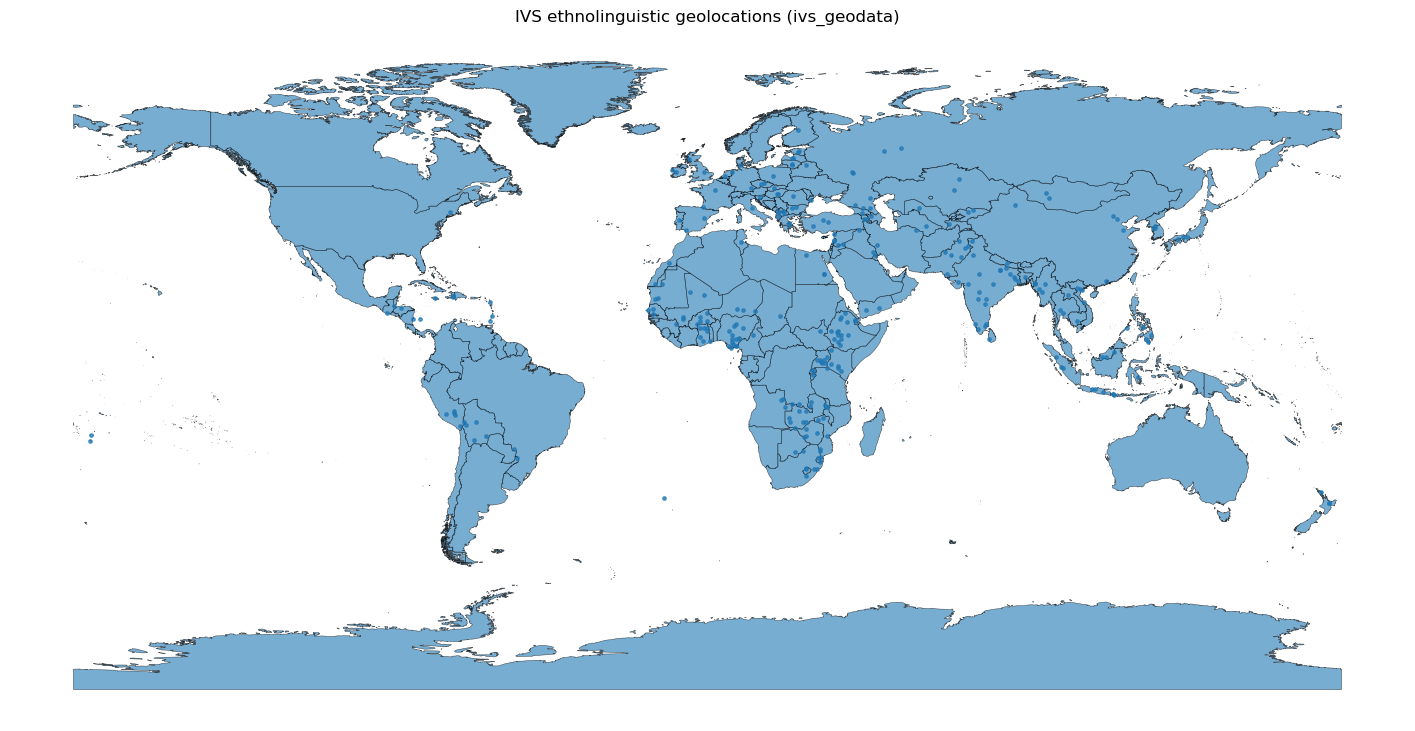

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

world_path = r"C:\Users\KORKUT\Desktop\Paper2_Final\World_Map\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp"

# --- DO NOT modify your original ivs_geodata ---
ivs_plot = ivs_geodata.copy()

# Ensure CRS on the COPY only (for plotting)
if ivs_plot.crs is None:
    ivs_plot = ivs_plot.set_crs("EPSG:4326", allow_override=True)

# Load world polygons and align CRS to ivs_plot (does not touch ivs_geodata)
world = gpd.read_file(world_path)
if world.crs is None:
    world = world.set_crs("EPSG:4326", allow_override=True)
world = world.to_crs(ivs_plot.crs)

# Plot (drop missing/empty geometry on the COPY only)
ivs_plot2 = ivs_plot.dropna(subset=["geometry"]).copy()
ivs_plot2 = ivs_plot2[~ivs_plot2.geometry.is_empty].copy()

fig, ax = plt.subplots(figsize=(18, 10))
world.plot(ax=ax, linewidth=0.4, edgecolor="black", alpha=0.6)
ivs_plot2.plot(ax=ax, markersize=6, alpha=0.7)

ax.set_title("IVS ethnolinguistic geolocations (ivs_geodata)")
ax.set_axis_off()
plt.show()


# Divisions within the Old World (rule-based macro-regions)

## We construct a coarse “Old World” domain as the set of ethnolinguistic homeland coordinates located within longitudes −30° to 180° and latitudes −35° to 90°. This bounding box is intended to capture Afro-Eurasia while excluding most of the Americas and extreme southern latitudes; it is used to define a transparent, reproducible geographic domain rather than a cartographically exact boundary.

## Within this Old World domain, we further partition locations into three macro-regions using two simple cutoffs:

# 1. Africa vs. Europe (latitude 36°N).
   ## We split Africa and Europe at 36°N within the western Old World longitudes (−30° to 50°E). This latitude is a pragmatic separator within the Mediterranean belt that reduces overlap in boundary-adjacent areas and yields a stable coarse partition for fixed-effects control.

# 2. Europe/Africa vs. Asia (longitude 50°E).
   ## We split Asia from western Eurasia at 50°E. This is an operational approximation chosen for transparency and stability. It does not claim to reproduce a unique “true” Europe–Asia boundary, which is historically conventional and defined differently across sources; the objective is a consistent macro-region partition rather than a precise geographic delineation.

# Interpretation and purpose.
## These macro-region assignments are used as an origin macro-region fixed effect (a nuisance control) to absorb broad, continent-scale heterogeneity in ethnolinguistic homelands. They are not intended as a precise measurement of continental membership, and any residual ambiguity near boundaries is addressed by robustness checks using alternative cutoffs and/or shapefile-based region assignments.


In [8]:

# Define a function to determine the continent based on latitude and longitude
def assign_continent(geometry):
    if geometry:
        lon, lat = geometry.x, geometry.y

        # Old World (Africa/Europe/Asia)
        if -30 <= lon <= 180 and -35 <= lat <= 90:

            # Africa_macro: keep it strictly below 36 to avoid overlap with Europe boundary cases
            if -30 <= lon < 50 and -35 <= lat < 36:
                return "Africa_macro"

            # Europe_macro:
            elif -30 <= lon < 50 and 36 <= lat <= 90:
                return "Europe_macro"

            # Asia_macro
            elif 50 <= lon <= 180 and -35 <= lat <= 90:
                return "Asia_macro"

        # Americas_macro
        elif -180 <= lon <= -30 and -90 <= lat <= 90:
            return "Americas_macro"

        # Oceania_Antarctica_band
        elif -180 <= lon <= 180 and -90 <= lat < -35:
            return "Oceania_Antarctica_band"

        else:
            return "Unknown"

    return None

# Apply the function to assign continents
ivs_geodata["origin_macro_region"] = ivs_geodata["geometry"].apply(assign_continent)

# Display the updated GeoDataFrame with the continent column
print(ivs_geodata.head())

  language_spkn_home glottolog_language             geometry  \
1               Afar               Afar        POINT (42 12)   
2               Afar               Afar  POINT (41.81 12.23)   
3          Afrikaans          Afrikaans       POINT (28 -16)   
5      Akan; Akuapem               Akan   POINT (-1.33 6.35)   
9           Albanian      Gheg Albanian  POINT (21.38 42.32)   

  origin_macro_region  
1        Africa_macro  
2        Africa_macro  
3        Africa_macro  
5        Africa_macro  
9        Europe_macro  


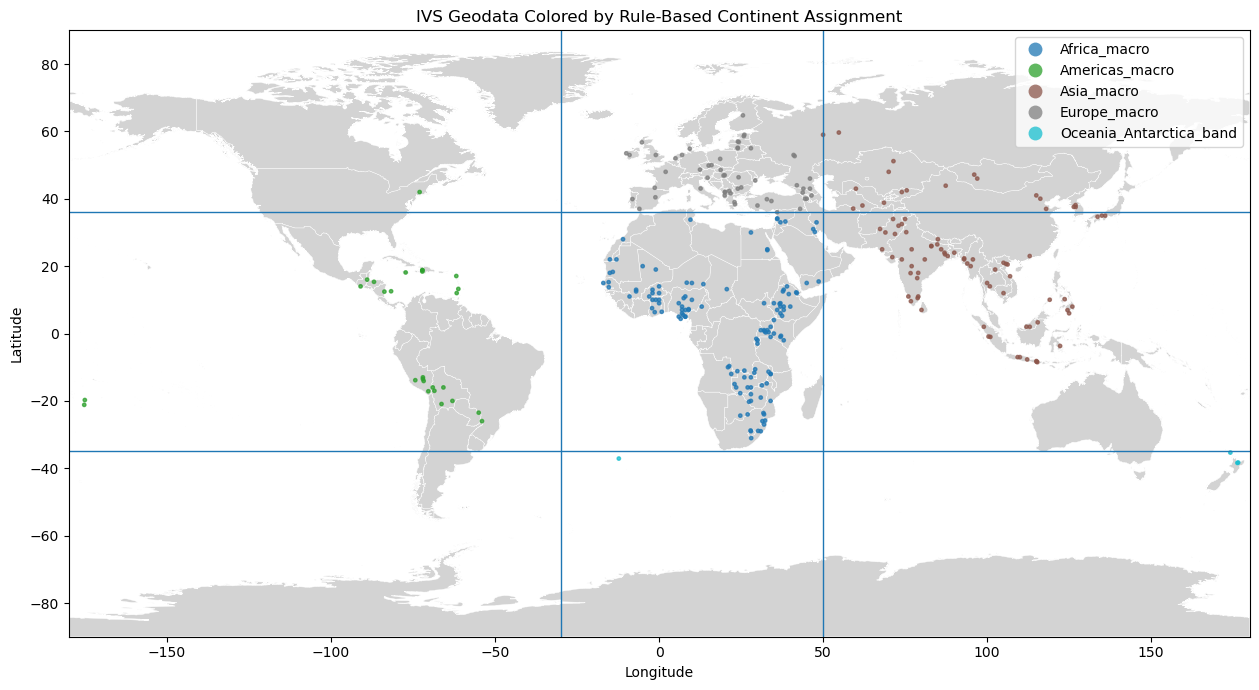

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd

# If you haven't loaded the world shapefile in this session, do it:
world_path = r"C:\Users\KORKUT\Desktop\Paper2_Final\World_Map\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp"
world = gpd.read_file(world_path)

# Ensure CRS matches for clean plotting
if ivs_geodata.crs is None:
    ivs_geodata = ivs_geodata.set_crs("EPSG:4326")
if world.crs is None:
    world = world.set_crs("EPSG:4326")
if ivs_geodata.crs != world.crs:
    ivs_geodata = ivs_geodata.to_crs(world.crs)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Base map
world.plot(ax=ax, color="lightgrey", edgecolor="white", linewidth=0.3)

# Plot IVS points colored by your assigned continent
ivs_geodata.plot(
    ax=ax,
    column="origin_macro_region",
    categorical=True,
    legend=True,
    markersize=6,
    alpha=0.75
)

# Draw the rule-based boundaries you used (to visualize the partition)
ax.axvline(-30, linewidth=1)
ax.axvline(50, linewidth=1)
ax.axhline(36, linewidth=1)
ax.axhline(-35, linewidth=1)

# Map extent (global)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

ax.set_title("IVS Geodata Colored by Rule-Based Continent Assignment")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


In [12]:
# Step 1: Ensure 'geometry' column is valid and convert to GeoDataFrame
ivs_geodata['geometry'] = ivs_geodata['geometry'].apply(lambda x: loads(x) if isinstance(x, str) else x)
ivs_geodata = gpd.GeoDataFrame(ivs_geodata, geometry='geometry', crs='EPSG:4326')

# Step 2: Specify the output file path
output_path = r"C:\Users\KORKUT\Desktop\Paper2_Final\ivs_geolocation.geojson"

# Step 3: Save the GeoDataFrame as a GeoJSON file
ivs_geodata.to_file(output_path, driver='GeoJSON')

In [25]:
# Distances from Ethnolinguistic Locations to the Closest Choke Points (6 / 7) and Natural Harbour
import pandas as pd

file_paths = {
    "ivsLanDist_7chokes": r"C:\Users\KORKUT\Desktop\Paper2_Final\IVS_distances\qgis_ivsethnoling_chokepoints_englishchokep.csv",
    "ivsLanDist_6chokes": r"C:\Users\KORKUT\Desktop\Paper2_Final\IVS_distances\qgis_ivsethnoling_chokepoints.csv",
    "ivsLanDist_naturalharbour": r"C:\Users\KORKUT\Desktop\Paper2_Final\IVS_distances\qgis_ivsethnoling_naturalharbour.csv",
}

dfs = {}

for name, path in file_paths.items():
    try:
        dfs[name] = pd.read_csv(path)
        print(f"Loaded dataset: {name}, Shape: {dfs[name].shape}")
    except Exception as e:
        print(f"Error loading {name}: {e}")

# Assign DataFrames
ivsLanDist_7chokes = dfs["ivsLanDist_7chokes"]
ivsLanDist_6chokes = dfs["ivsLanDist_6chokes"]
ivsLanDist_naturalharbour = dfs["ivsLanDist_naturalharbour"]

# Optional quick sanity checks
print("\nColumns (7 chokes):", ivsLanDist_7chokes.columns.tolist())
print("Columns (6 chokes):", ivsLanDist_6chokes.columns.tolist())
print("Columns (natural harbour):", ivsLanDist_naturalharbour.columns.tolist())

Loaded dataset: ivsLanDist_7chokes, Shape: (298, 5)
Loaded dataset: ivsLanDist_6chokes, Shape: (298, 5)
Loaded dataset: ivsLanDist_naturalharbour, Shape: (298, 5)

Columns (7 chokes): ['language_spkn_home', 'glottolog_language', 'origin_macro_region', 'HubName', 'HubDist']
Columns (6 chokes): ['language_spkn_home', 'glottolog_language', 'origin_macro_region', 'HubName', 'HubDist']
Columns (natural harbour): ['language_spkn_home', 'glottolog_language', 'origin_macro_region', 'HubName', 'HubDist']


In [33]:
import numpy as np
import pandas as pd

OLD_WORLD_CONTINENTS = {"Africa_macro", "Asia_macro", "Europe_macro"}

def prepare_oldworld_unique_language(df, region_col="origin_macro_region"):
    d = df.copy()

    # Normalize region labels (do NOT use .title(), keep exact labels)
    d[region_col] = d[region_col].astype(str).str.strip()

    def is_old(c):
        return c in OLD_WORLD_CONTINENTS

    def is_new(c):
        # treat these as missing/unknown, not "new"
        if c in {"", "nan", "None", "Unknown", "NaN"}:
            return False
        return c not in OLD_WORLD_CONTINENTS

    # Language appears in Old and/or New macro-regions
    lang_has_old = d.groupby("language_spkn_home")[region_col].apply(lambda s: any(is_old(x) for x in s))
    lang_has_new = d.groupby("language_spkn_home")[region_col].apply(lambda s: any(is_new(x) for x in s))

    # Drop languages that appear in BOTH Old and New World
    drop_langs = lang_has_old[lang_has_old & lang_has_new].index
    d = d[~d["language_spkn_home"].isin(drop_langs)].copy()

    # Keep only Old World rows
    d = d[d[region_col].isin(OLD_WORLD_CONTINENTS)].copy()

    # Assign ONE origin macro-region per language: mode within Old World
    cont_mode = (
        d.groupby("language_spkn_home")[region_col]
         .apply(lambda s: s.value_counts().idxmax())
         .reset_index()
         .rename(columns={region_col: region_col})
    )

    return d, cont_mode


def process_dataframe(df, dist_col_name, ln_dist_col_name,
                      region_col="origin_macro_region",
                      hubdist_col="HubDist",
                      log_eps=0.01):
    """
    Aggregates to one row per language_spkn_home:
      - mean hub distance (hubdist_col) -> dist_col_name
      - ln(distance + log_eps) -> ln_dist_col_name
      - modal region_col within Old World
    """
    d_old, cont_mode = prepare_oldworld_unique_language(df, region_col=region_col)

    # Mean distance by language
    grouped = (
        d_old.groupby("language_spkn_home", as_index=False)[hubdist_col]
             .mean()
             .rename(columns={hubdist_col: dist_col_name})
    )

    # Attach origin macro-region (mode)
    grouped = grouped.merge(cont_mode, on="language_spkn_home", how="left")

    # Log transform
    grouped[ln_dist_col_name] = np.log(grouped[dist_col_name] + log_eps)

    return grouped


# -----------------------------
# 6 chokes
# -----------------------------
ivsLanDist_6chokes_grouped = process_dataframe(
    ivsLanDist_6chokes,
    dist_col_name="dist_6chokes",
    ln_dist_col_name="lndist_6chokes",
    region_col="origin_macro_region",
    hubdist_col="HubDist"
)

# -----------------------------
# 7 chokes (includes English Channel)
# -----------------------------
ivsLanDist_7chokes_grouped = process_dataframe(
    ivsLanDist_7chokes,
    dist_col_name="dist_7chokes",
    ln_dist_col_name="lndist_7chokes",
    region_col="origin_macro_region",
    hubdist_col="HubDist"
)

# -----------------------------
# natural harbour (distance only)
# -----------------------------
ivsLanDist_naturalharbour_grouped = process_dataframe(
    ivsLanDist_naturalharbour,
    dist_col_name="dist_naturalharbour",
    ln_dist_col_name="lndist_naturalharbour",
    region_col="origin_macro_region",
    hubdist_col="HubDist"
)

# Quick checks
print("6chokes grouped:", ivsLanDist_6chokes_grouped.shape)
print("7chokes grouped:", ivsLanDist_7chokes_grouped.shape)
print("harbour grouped:", ivsLanDist_naturalharbour_grouped.shape)

6chokes grouped: (162, 4)
7chokes grouped: (162, 4)
harbour grouped: (162, 4)


In [34]:
import pandas as pd

# Outer-merge all three at language level
merged_lang_distances = (
    ivsLanDist_6chokes_grouped
      .merge(ivsLanDist_7chokes_grouped, on="language_spkn_home", how="outer", suffixes=("_6", "_7"))
      .merge(ivsLanDist_naturalharbour_grouped, on="language_spkn_home", how="outer")
)

# Keep one origin_macro_region: prefer 7-chokes, then 6-chokes, then harbour
merged_lang_distances["origin_macro_region"] = (
    merged_lang_distances["origin_macro_region_7"]
      .fillna(merged_lang_distances["origin_macro_region_6"])
      .fillna(merged_lang_distances.get("origin_macro_region"))
)

# Drop duplicate region cols (if present)
merged_lang_distances = merged_lang_distances.drop(
    columns=[c for c in ["origin_macro_region_6", "origin_macro_region_7"] if c in merged_lang_distances.columns],
    errors="ignore"
)

# (optional) keep only the main columns you care about
merged_lang_distances = merged_lang_distances[
    ["language_spkn_home", "origin_macro_region",
     "dist_6chokes", "lndist_6chokes",
     "dist_7chokes", "lndist_7chokes",
     "dist_naturalharbour", "lndist_naturalharbour"]
]

print(merged_lang_distances.shape)
print(merged_lang_distances.head())



(162, 8)
  language_spkn_home origin_macro_region  dist_6chokes  lndist_6chokes  \
0               Afar        Africa_macro    162.053894        5.087991   
1          Afrikaans        Africa_macro   3581.917975        8.183656   
2      Akan; Akuapem        Africa_macro   3307.597162        8.103980   
3           Albanian        Europe_macro    731.935333        6.595706   
4            Amharic        Africa_macro    535.002959        6.282291   

   dist_7chokes  lndist_7chokes  dist_naturalharbour  lndist_naturalharbour  
0    162.053894        5.087991           132.095314               4.883599  
1   3581.917975        8.183656           838.988504               6.732209  
2   3307.597162        8.103980           130.899967               4.874510  
3    731.935333        6.595706            76.506110               4.337501  
4    535.002959        6.282291           366.191136               5.903183  


In [37]:
merged_lang_distances.head()

,language_spkn_home,origin_macro_region,dist_6chokes,lndist_6chokes,dist_7chokes,lndist_7chokes,dist_naturalharbour,lndist_naturalharbour
0,Afar,Africa_macro,162.053894,5.087991,162.053894,5.087991,132.095314,4.883599
1,Afrikaans,Africa_macro,3581.917975,8.183656,3581.917975,8.183656,838.988504,6.732209
2,Akan; Akuapem,Africa_macro,3307.597162,8.103980,3307.597162,8.103980,130.899967,4.874510
3,Albanian,Europe_macro,731.935333,6.595706,731.935333,6.595706,76.506110,4.337501
4,Amharic,Africa_macro,535.002959,6.282291,535.002959,6.282291,366.191136,5.903183


In [39]:
import os

out_dir = r"C:\Users\KORKUT\Desktop\Paper2_Final"
os.makedirs(out_dir, exist_ok=True)

out_file = os.path.join(out_dir, "ivs_distances.dta")

# merged_distances is assumed to be your final pandas DataFrame
merged_lang_distances.to_stata(out_file, write_index=False, version=118)

print("Saved:", out_file)


Saved: C:\Users\KORKUT\Desktop\Paper2_Final\ivs_distances.dta
